<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW3/Project3Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 3 Report**


**CSC346**


**9/30/23**

# **Part 1: SQL**

For this project, I used MySQLWorkbench, and DataGrip IDE to complete the SQL statements and run the MySQL server. Due to this, I could not make any windowed functions, so I used variable to help address this issue.


When first examining the data, I immediately noticed the volume of data that needed to be used. Because of this, I knew that I could not manually attempt the SQL queries. This became evident in the second query where I need to address the 0 and null values in the Population column.

To begin, below is the code I executed for the first query that asks us to delete all rows with a population that is 0.

In this query, I needed to see how many 0 values were in the column. This information is important because I can see if my code is successful by executing this code segment before and after I implement my code solution. If there are changes in the value, I know that my solution worked.

In [ ]:
# Code segment to test 0 values in Population column
select Country, Population
from expectancy
where Population = 0 or Population is null;

Below is the Countries with 0 population before cleansing the data set.

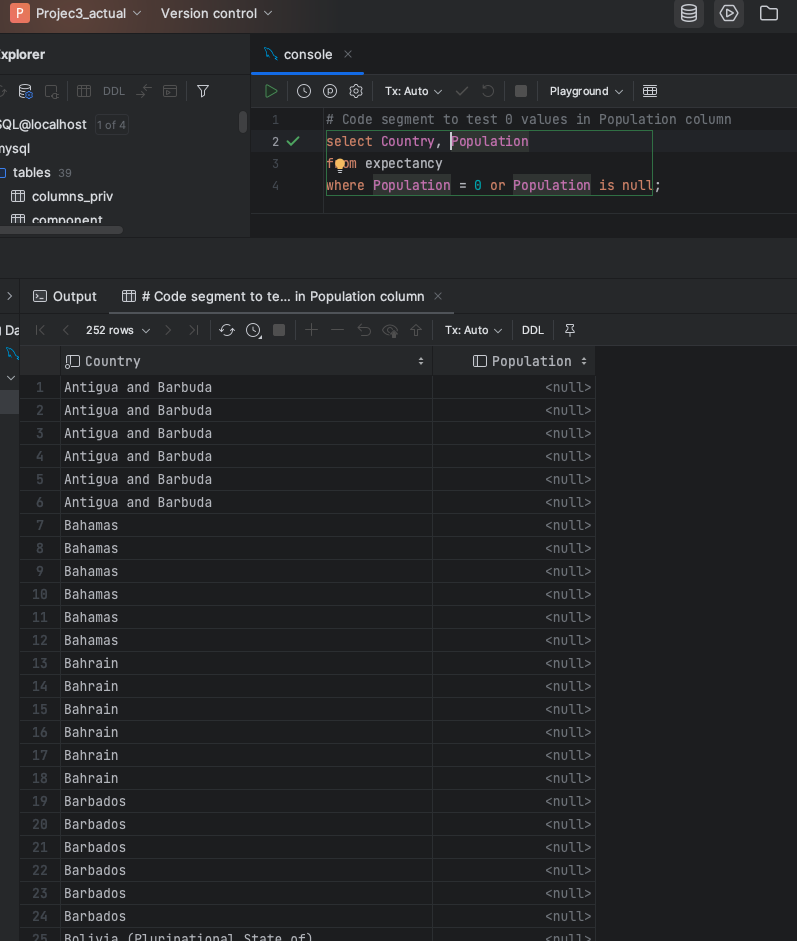

In [ ]:

# Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.
delete from expectancy where Population = 0 or Population is null;


In order to check that this code executed properly, I tested the table using the following SQL statement:

In [ ]:
# Code segment to test 0 values in Population column
select Population
from expectancy
where Population = 0;

Below is a picture of the output:

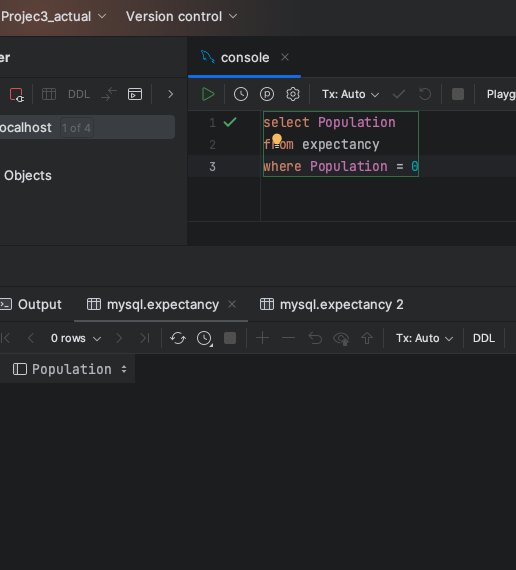

From this output, we can see that there is no longer any values in the Population column that are zero.

To further prep this data set for analysis, I needed to cleanse the data to prevent any deviations in the data analysis, and this will help me examine the code and determine valuable versus invaluable data for the purpose of my project.

As we know from statistical analysis, removing outliers is a crucial step in cleansing data. It removes data that could possibly interfere with analysis and skew results.

First, I must identify outliers in the data set. I selected the outliers by choosing the data that resides outside +/- 3 standard deviation because that is the standard for removing numerical outliers.

In [ ]:
# Testing if outliers are present in data and if so, select the outliers and display them
Select * from
(Select Country, Life_expectancy,
(Life_expectancy - avg(Life_expectancy) over()) / STD(Life_expectancy) over() as zscore
from expectancy) as score_table
where zscore > 3 or zscore < -3;

Below is the result:

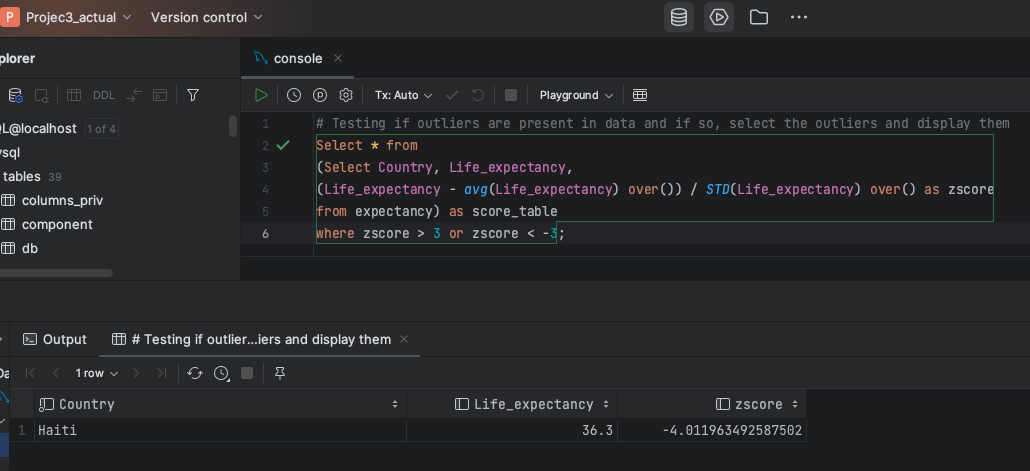

Haiti is the outlier of this data set. The best course of action would be to impute the average life expectancy value into this data and rerun the test to ensure there would no longer be an outlier. However, since there are many instances of Haiti in the data set, it makes this solution difficult. So even though it was not the ideal solution, I decided to remove this row from the data set to remove the outlier.

To remove outliers in this data set, I calculated the zscore of the Life_expectancy column. I chose to do calculations for only this column because in the description of this data set, it was explained that the Life_expectancy values are dependent on the other values given in the table, like mortality rates, schooling, GDP, etc. As a result, any outlier in the Life_expectancy data can be assumed to be an outlier for the other values in the data set.

In this code segment, I created two variables for my query to use: avg_expectancy, which stores the avergage Life_expectancy, and std_expectancy, which stores the standard deviation for the Life_expectancy column.

To calculate the zscore I used the equation: Z = X - u / standard deviation. I removed any countries fall outside +/- 3 standard deviation because that is the standard procedure for removing numerical outliers.

In [ ]:
# Removing outliers outside +/- 3 standard deviation
set @avg_expectancy = (select avg(Life_expectancy) from expectancy);
set @std_expectancy = (select STD(Life_Expectancy) from expectancy);

delete from expectancy
where ((Life_expectancy - @avg_expectancy) / @std_expectancy) < -3 and ((Life_expectancy - @avg_expectancy) / @std_expectancy) > 3;

Now, I can test to see if my solution worked and removed the outliers. Below is the testing code:

In [ ]:
# Testing if outliers were removed
Select * from
(Select Country, Life_expectancy,
(Life_expectancy - avg(Life_expectancy) over()) / STD(Life_expectancy) over() as zscore
from expectancy) as score_table
where zscore > 3 or zscore < -3;

Here are the results of that code:

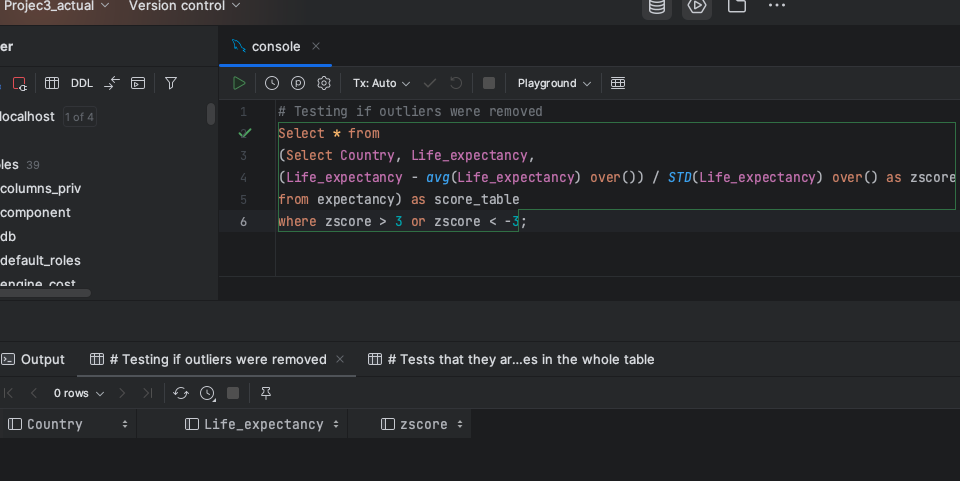

Since the returning set is empty, we can conclude that the solution worked and removed any outliers in the data set.

To continue to cleanse the data, I noticed many null values throughout the columns in my inital examination of the data set. I need to impute those null values with some data so that I can analyze the data properly.

Because the columns I am looking at are all numerical, I can impute the null values with the averages of that specific column. For example, I will impute the GDP average into any null values in that column, but I would imput the Schooling average to null values in the Schooling column.

In [ ]:
# Defines the averages of each column to impute in the data
SET @life_avg = (SELECT avg(Life_Expectancy) from expectancy);
SET @school_avg = (SELECT avg(Schooling) from expectancy);
SET @gdp_avg = (SELECT avg(GDP) from expectancy);
SET @tot_avg = (SELECT avg(Total_Expenditure) from expectancy);
SET @bmi_avg = (SELECT avg(BMI) from expectancy);
SET @percent_avg = (SELECT avg(Percentage_Expenditure) from expectancy);
SET @alc_avg = (SELECT avg(Alcohol) from expectancy);
SET @adult_avg = (SELECT avg(Adult_Mortality) from expectancy);

# Imputes Life_expectancy average into null values in that column
update expectancy
set Life_Expectancy = @life_avg
where Life_Expectancy is null;

# Imputes Schooling average into null values in that column
update expectancy
set Schooling = @school_avg
where Schooling is null;

# Imputes GDP average into null values in that column
update expectancy
set GDP = @gdp_avg
where GDP is null;

# Imputes Total Expenditure average into null values in that column
update expectancy
set Total_Expenditure = @tot_avg
where Total_Expenditure is null;

# Imputes BMI average into null values in that column
update expectancy
set BMI = @bmi_avg
where BMI is null;

# Imputes Percentage Expenditure average into null values in that column
update expectancy
set Percentage_Expenditure = @percent_avg
where Percentage_Expenditure is null;

# Imputes Alcohol average into null values in that column
update expectancy
set Alcohol = @alc_avg
where Alcohol is null;

# Imputes Adult_Mortality average into null values in that column
update expectancy
set Adult_Mortality = @adult_avg
where Adult_Mortality is null;

To test that these statements correctly adjusted the table, I ran the following code:

In [ ]:
# Tests that they are no loner null values in the whole table
select *
from expectancy
where Life_Expectancy is null or Population is null or Adult_Mortality is null or
Alcohol is null or Percentage_Expenditure is null or BMI is null or GDP is null or
Total_Expenditure is null or Schooling is null or Population is null;

These are the results:

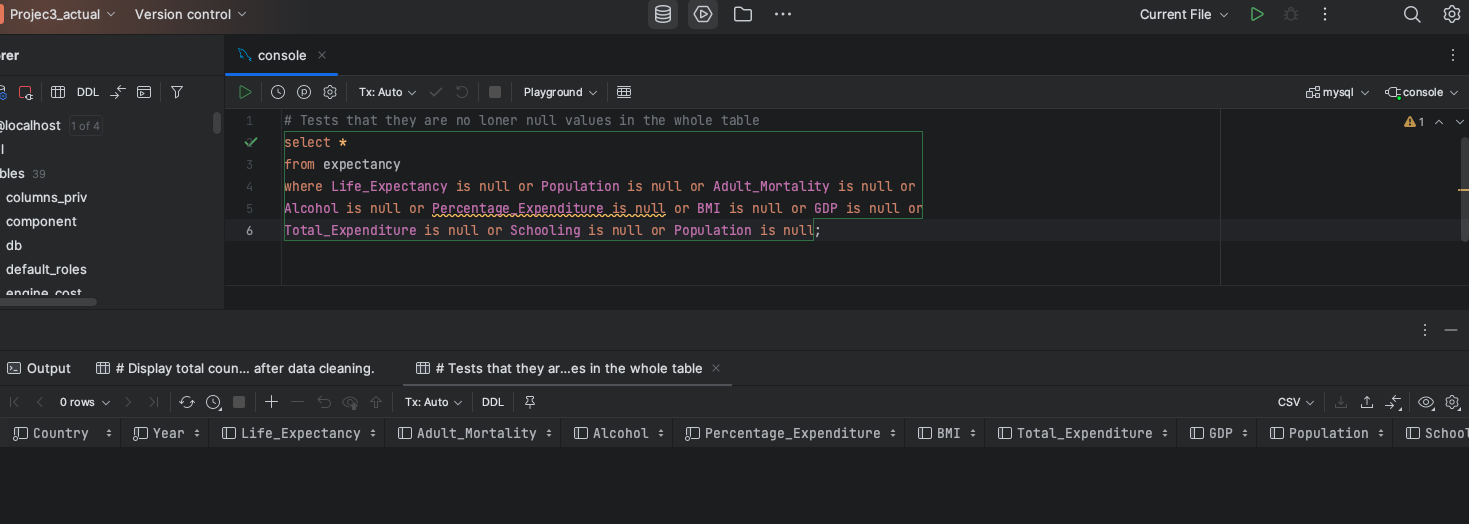

Before cleansing the data, I used the following code to determine the total number of countries in this data set.

In [ ]:
# Display total count of countries before data cleaning.
select count(Country) from expectancy;

This was the output:

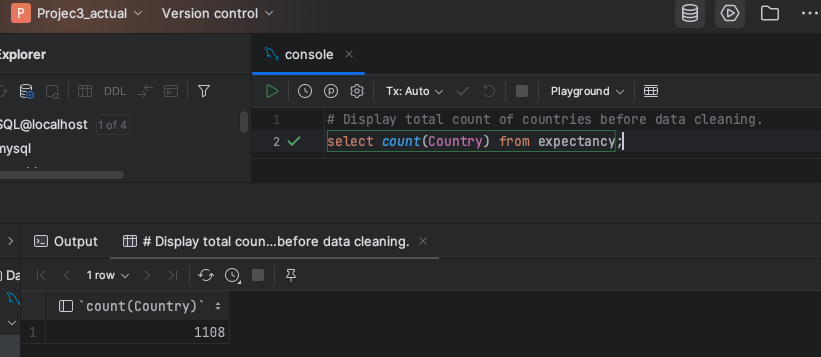

After cleansing the data, I executed the same code segment and got this result:

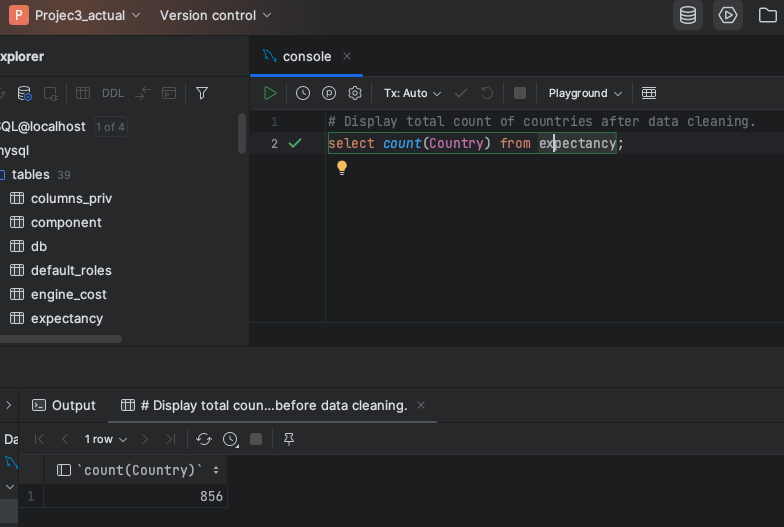

After cleansing the data, I can see that the amount of rows changed, but it will help my analysis later on to be more accurate and valuable.

For the next query, I had to list the countries with the highest and lowest average mortality rates over the years 2010 to 2015.

In order to get both the highest and lowest average values, I used the UNION function SQL to complete both in the same statement. As well as the limit function to get the top and bottom of the selection list, which would be the highest and lowest values.

In [ ]:
# List of countries with the highest and lowest average mortality rates (years 2010-2015)
(select Country, avg(Adult_Mortality) as Avg_Mortality
from expectancy
where year between 2010 and 2015
group by Country
order by Avg_Mortality desc
limit 1)
UNION
(select Country, avg(Adult_Mortality) as Avg_Mortality
from expectancy
where year between 2010 AND 2015
group by Country
order by Avg_Mortality
limit 1);


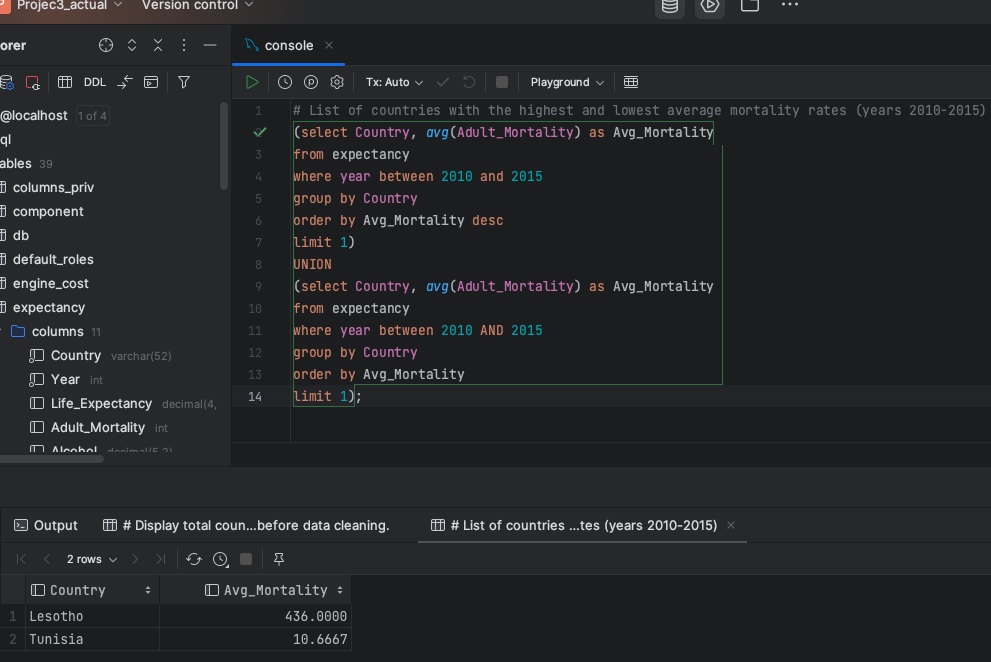

I applied the same logic to the next few SQL queries to get countries with the highest and lowest average values for population, GDP, Schooling, and Alcohol Consumption over 2010-2015.

Below are those queries:

In [ ]:
# List of countries with the highest and lowest average population (years 2010-2015)
(select Country, avg(Population) as Avg_Population
from expectancy
where year between 2010 and 2015
group by Country
order by Avg_Population desc
limit 1)
UNION
(select Country, avg(Population) as Avg_Population
from expectancy
where year between 2010 AND 2015
group by Country
order by Avg_Population
limit 1);

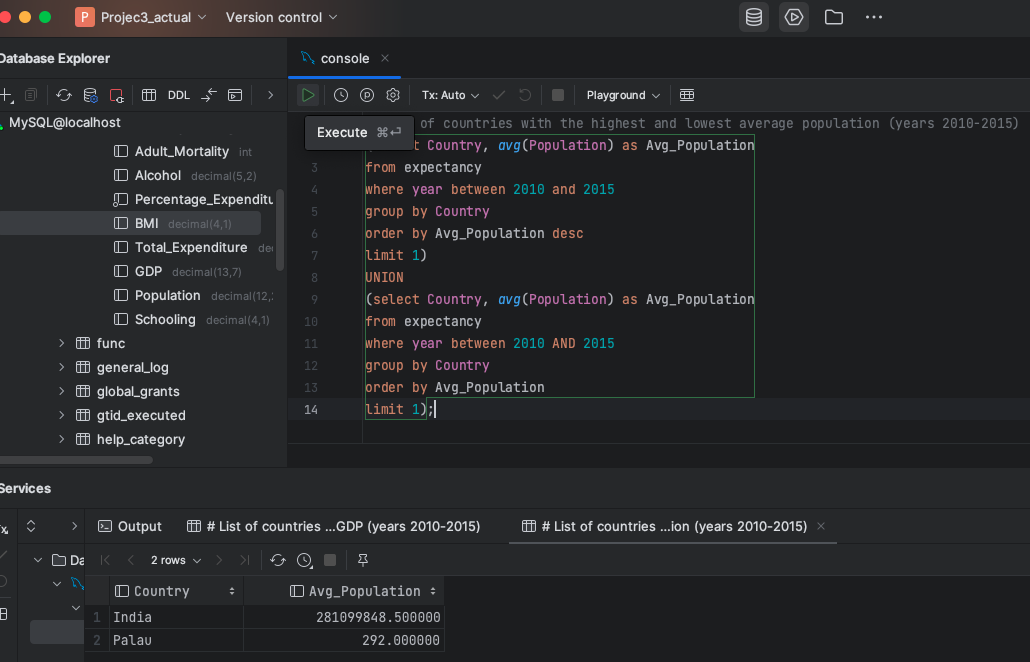

In [ ]:
# List of countries with the highest and lowest average GDP (years 2010-2015)
(select Country, avg(GDP) as Avg_GDP
from expectancy
where year between 2010 and 2015
group by Country
order by Avg_GDP desc
limit 1)
UNION
(select Country, avg(GDP) as Avg_GDP
from expectancy
where year between 2010 AND 2015
group by Country
order by Avg_GDP
limit 1);

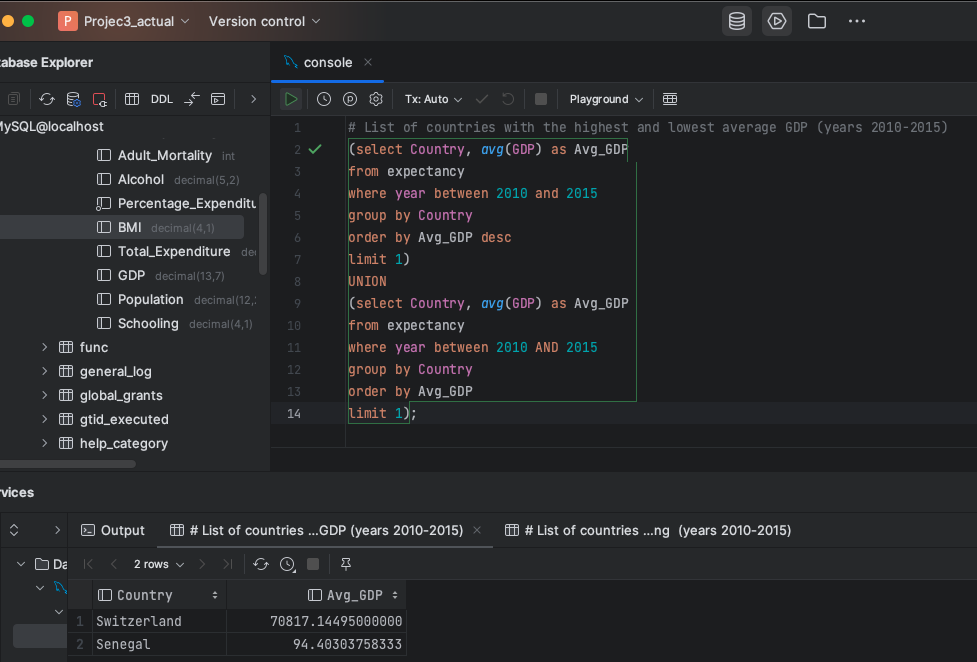

In [ ]:
# List of countries with the highest and lowest average Schooling  (years 2010-2015)
(select Country, avg(Schooling) as Avg_Schooling
from expectancy
where year between 2010 and 2015
group by Country
order by Avg_Schooling desc
limit 1)
UNION
(select Country, avg(Schooling) as Avg_Schooling
from expectancy
where year between 2010 AND 2015
group by Country
order by Avg_Schooling
limit 1);


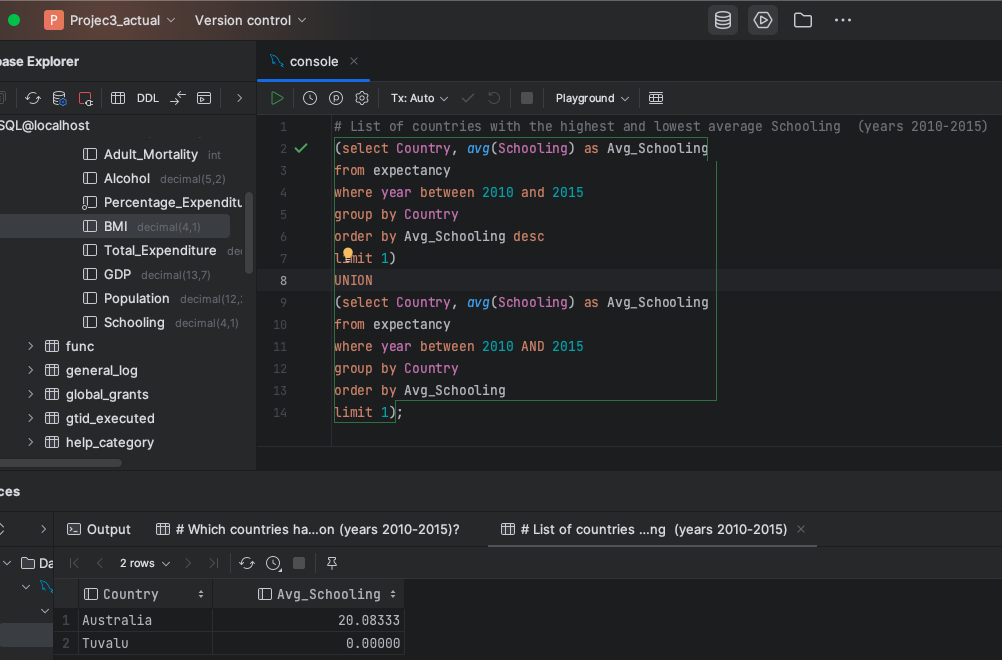

In [ ]:
# Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?
(select Country, avg(Alcohol) as Avg_Alc
from expectancy
where year between 2010 and 2015
group by Country
order by Avg_Alc desc
limit 1)
UNION
(select Country, avg(Alcohol) as Avg_Alc
from expectancy
where year between 2010 AND 2015
group by Country
order by Avg_Alc
limit 1);

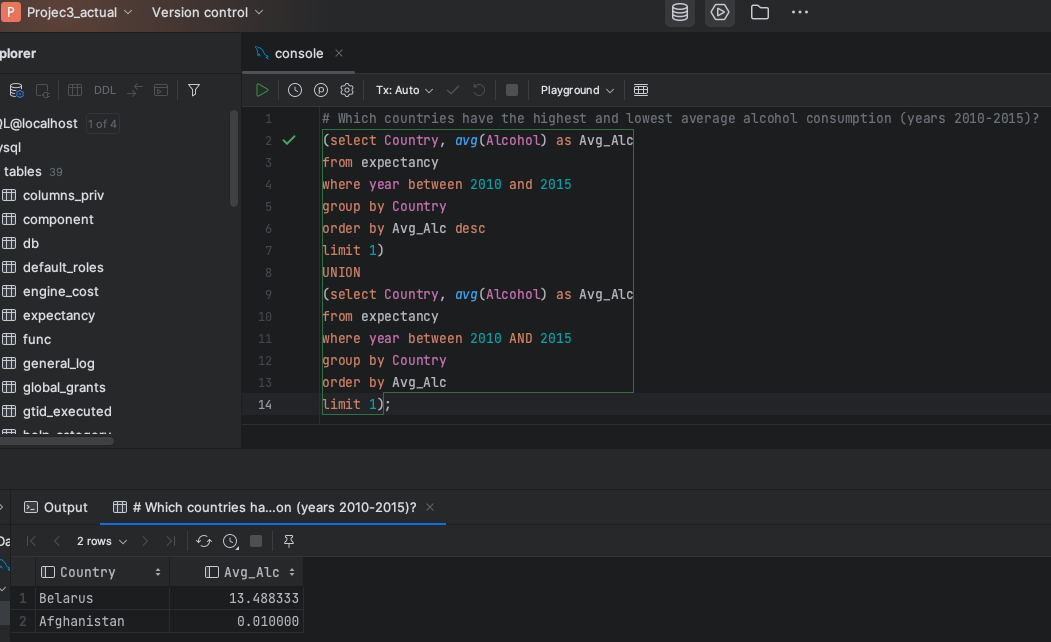

Next, I analzyed the relationship between densely populated countries and their life expectancies. I was specifically asked to examine densely populated countries and determine whether they are lower life expectancies.

In order to determine the life expectancies of densely populated countries, I executed the following command:

In [ ]:
# Selects all the Countries with their populations, and life expectancies and organizes them in descending order by Population
select Country, Life_Expectancy, Population
from expectancy
order by Population desc;

Results:

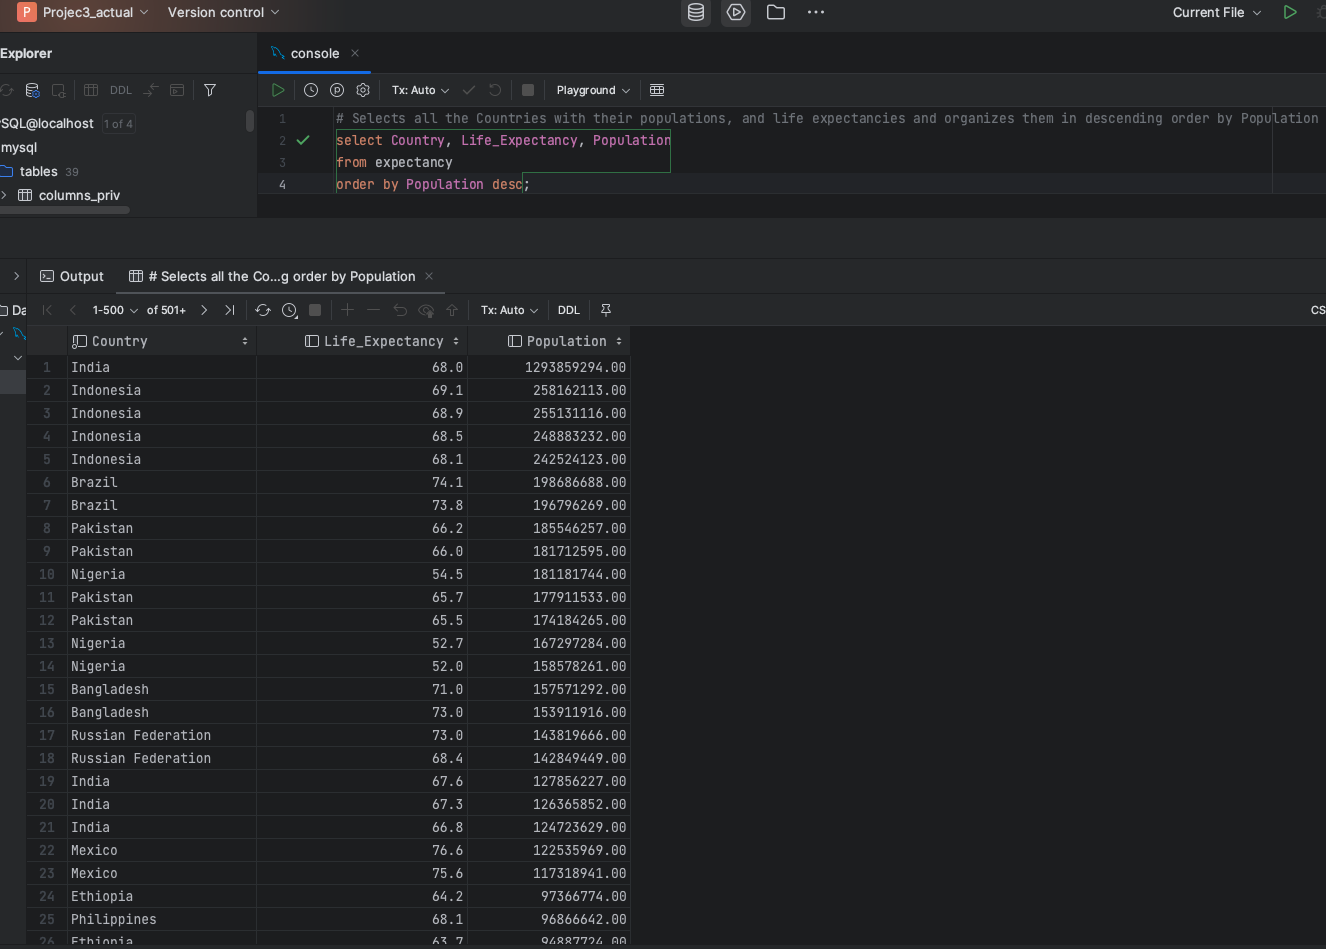

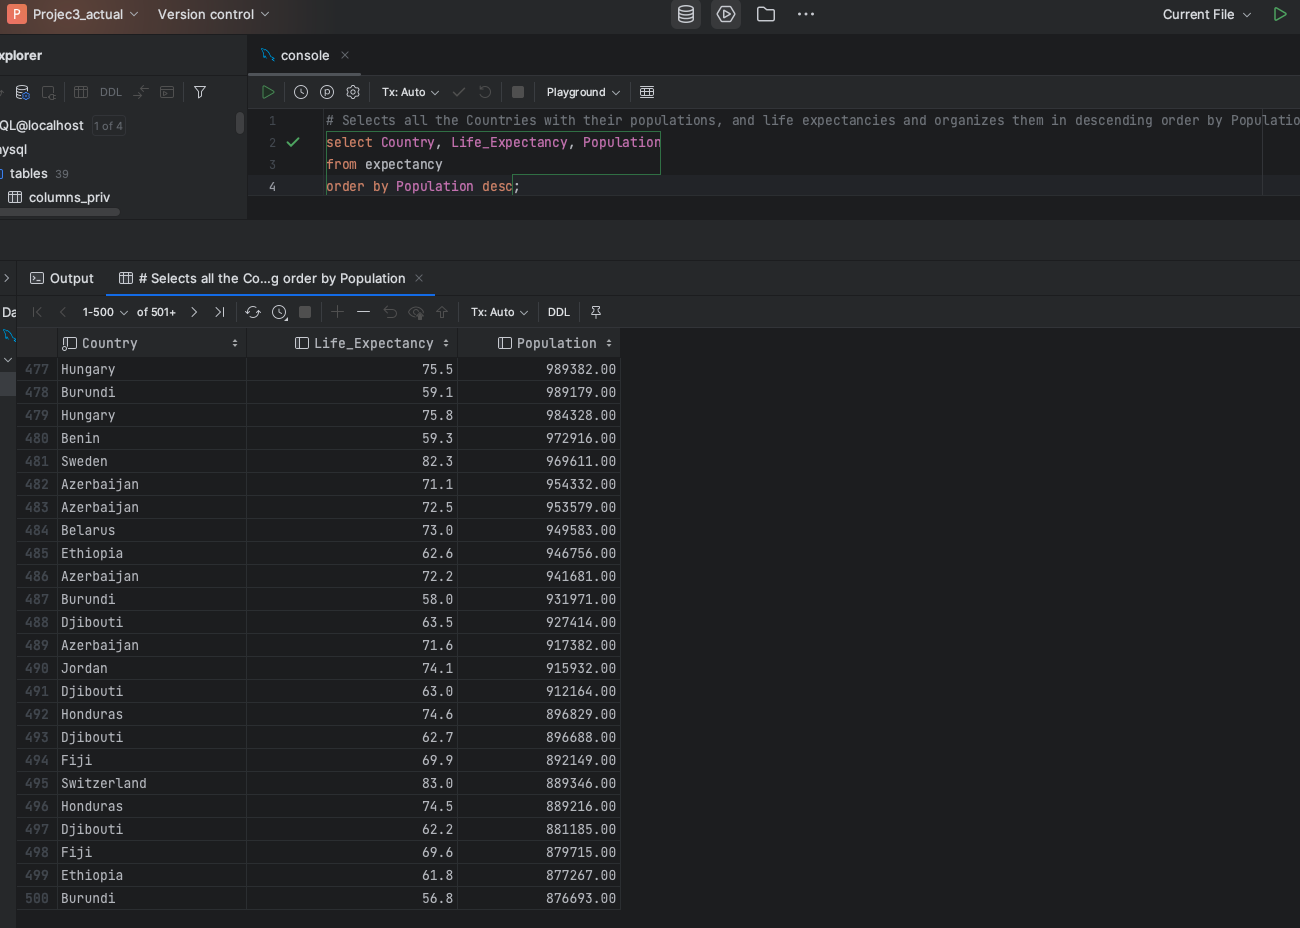

The results of this query was too long to capture in one photo, however, the trend I saw was that as the population gest denser, the life expectancy would be higher compared to countries with less dense populations. So no, the densely populated countries tend to have higher life expectancy.

# **Part 2: Python**

Now that I have a cleansed data set, I can create a model using Python data frames.

To start, I imported the necessary libraries to create data frames, plot linear regression, and add the ability for me to visualize the data set.

In [ ]:
# Imports Pandas library to create data frames
import pandas as pd

# Imports tabulate to create tables to visualize data frame
from tabulate import tabulate

# Imports the necessary libraries to plot linear regression
import numpy as np
import matplotlib.pyplot as plt


Next, I exported my cleansed data set from DataGrip as a CSV file. From there, I uploaded that file to my HW3 repository in GitHub where I copied the link to the raw version of the cleansed data set.

I pasted the link in a variable below.

In [ ]:
# Stores url link to cleansed data set from Part 1 SQL
url = "https://raw.githubusercontent.com/gabriela-148/IDS/main/HW3/expectancy_cleansed.csv"

Next, I created a data frame using the read_csv function from the pandas library.

In [ ]:
# Creates a data frame with the cleansed CSV data set from Expectancy table
expectancyDF = pd.read_csv(url, sep=",")

To ensure that I imported the data correctly, I want to print out the data frame in a table format so I can determine whether any crucial data is missing.

In [ ]:
# Prints out data set in a table format
print(tabulate(expectancyDF, headers='keys', tablefmt='fancy_grid'))

╒══════╤══════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═══════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                  │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │   BMI │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═══════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan              │   2010 │              58.8 │               279 │      0.01 │                79.6794   │  16.7 │                9.2  │    553.329   │      2.88317e+06 │         9.2 │
├──────┼──────────────────────────┼────────┼───────────────────┼───────────────────┼───────────┼──────────────────────────┼───────┼─────────────────────┼──────────────┼──────────────────┼─────

Now, I convert the data frame to numpy in order to calculate correlation and corvaraince so I can decifer what factors truly affect life expectancy.

In [ ]:
# Converts the data frame to numpy for correlation and covariance analysis
expectancyDF.to_numpy()

array([['Afghanistan', 2010, 58.8, ..., 553.32894, 2883167.0, 9.2],
       ['Afghanistan', 2011, 59.2, ..., 63.537231, 2978599.0, 9.5],
       ['Afghanistan', 2012, 59.5, ..., 669.959, 3696958.0, 9.8],
       ...,
       ['Zimbabwe', 2013, 58.0, ..., 111.227396, 155456.0, 10.4],
       ['Zimbabwe', 2014, 59.2, ..., 127.47462, 15411675.0, 10.3],
       ['Zimbabwe', 2015, 67.0, ..., 118.69383, 15777451.0, 10.3]],
      dtype=object)

First, I am calculating covariance to see which factors have the highest positive relationship with Life_Expectancy.

In [ ]:
# Gets covariance for all variables
expectancyDF.cov()

<ipython-input-7-74c28e9a6aa9>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  expectancyDF.cov()


,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,2.911351e+00,8.279566e-01,-4.516525e+00,-7.698827e-01,-3.819700e+02,1.830587e+00,7.853175e-02,-3.527837e+02,2.120397e+06,3.248211e-01
Life_Expectancy,8.279566e-01,7.764599e+01,-7.183418e+02,1.474912e+01,8.040451e+03,9.568032e+01,5.087960e+00,6.100064e+04,-1.610159e+07,2.131899e+01
Adult_Mortality,-4.516525e+00,-7.183418e+02,1.201830e+04,-9.622552e+01,-6.405721e+04,-8.846565e+02,-3.696564e+01,-4.854647e+05,1.481063e+08,-1.832099e+02
Alcohol,-7.698827e-01,1.474912e+01,-9.622552e+01,1.433610e+01,3.419232e+03,2.132750e+01,2.239106e+00,2.338463e+04,-6.245832e+06,6.098686e+00
Percentage_Expenditure,-3.819700e+02,8.040451e+03,-6.405721e+04,3.419232e+03,5.569892e+06,9.998840e+03,1.516766e+03,3.137081e+07,-3.611672e+09,2.670125e+03
BMI,1.830587e+00,9.568032e+01,-8.846565e+02,2.132750e+01,9.998840e+03,4.239817e+02,8.274777e+00,8.277703e+04,-8.281584e+07,3.013089e+01
Total_Expenditure,7.853175e-02,5.087960e+00,-3.696564e+01,2.239106e+00,1.516766e+03,8.274777e+00,5.658737e+00,9.004699e+03,-9.426462e+06,1.652082e+00
GDP,-3.527837e+02,6.100064e+04,-4.854647e+05,2.338463e+04,3.137081e+07,8.277703e+04,9.004699e+03,2.190149e+08,-2.302809e+10,2.122944e+04
Population,2.120397e+06,-1.610159e+07,1.481063e+08,-6.245832e+06,-3.611672e+09,-8.281584e+07,-9.426462e+06,-2.302809e+10,2.877326e+15,-7.305701e+06
Schooling,3.248211e-01,2.131899e+01,-1.832099e+02,6.098686e+00,2.670125e+03,3.013089e+01,1.652082e+00,2.122944e+04,-7.305701e+06,9.203407e+00


When looking at the Life_Expectancy column, the top three factors are BMI, Percentage_Expenditure and GDP. However, this data is not very helpful to me because it just tells me that BMI, Percentage_Expenditure, and GDP have a positive relationship with Life_Expectancy, and no other information about the relationship itself.

Now, I will calculate correlation for all factors. This will indicate the factors' relationships and the degree of the relationships. The closer to one the value is, the better relation they have.

In [ ]:
# Gets correlation for all variables
expectancyDF.corr()

<ipython-input-8-a8a4b51cf4e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  expectancyDF.corr()


,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.055068,-0.024145,-0.119169,-0.094855,0.052104,0.019348,-0.013971,0.023167,0.062751
Life_Expectancy,0.055068,1.000000,-0.743619,0.442070,0.386632,0.527339,0.242731,0.467776,-0.034065,0.797504
Adult_Mortality,-0.024145,-0.743619,1.000000,-0.231821,-0.247584,-0.391904,-0.141748,-0.299226,0.025186,-0.550875
Alcohol,-0.119169,0.442070,-0.231821,1.000000,0.382639,0.273559,0.248599,0.417329,-0.030752,0.530941
Percentage_Expenditure,-0.094855,0.386632,-0.247584,0.382639,1.000000,0.205756,0.270169,0.898184,-0.028529,0.372936
BMI,0.052104,0.527339,-0.391904,0.273559,0.205756,1.000000,0.168936,0.271644,-0.074980,0.482352
Total_Expenditure,0.019348,0.242731,-0.141748,0.248599,0.270169,0.168936,1.000000,0.255784,-0.073874,0.228927
GDP,-0.013971,0.467776,-0.299226,0.417329,0.898184,0.271644,0.255784,1.000000,-0.029009,0.472854
Population,0.023167,-0.034065,0.025186,-0.030752,-0.028529,-0.074980,-0.073874,-0.029009,1.000000,-0.044894
Schooling,0.062751,0.797504,-0.550875,0.530941,0.372936,0.482352,0.228927,0.472854,-0.044894,1.000000


In this case, the top three factors are Schooling, BMI, and GDP (in that order). This tells me that Schooling has the strongest correlation with Life_Expectancy followed by BMI and then GDP.

After conducting the correlation analysis, I can now compare factors against life expectancy.

When comparing factors like Adult Mortality and its relation with Life expectancy, I found that their correlation was around -0.7. Correlation is measured on a scale of -1 to 1. When the correlation is closer to -1, that means that the two factors are unrelated. When it is 0, there is no relation and when it is 1 there is a relation. So, when looking at this -0.7 value between Adult Mortality and Life expectnacy, I can conclude that these two factors are unrelated from one another and therefore, do not affect each other in any way.

Based on these correlation values, alcohol have a postive correlation with life expectancy. This means that there is a relation between the two factors. Population and BMI have negative correlations which means there population and BMI are unrelated to life expectancy. Finally, both total and percentage expenditure has a positive correlation. Meaning that government spending has an effect on life expectancy.  

Schooling does have an impact on the lifespan of humans because the correlation between Schooling and Life_expectancy is the highest out of any of the factors. The value is around 0.79. The relation between the two is high. This data is rational because there has been multiple studies done on the effects of college educaiton on lifespan and it has been concluded that college education does prolong life expectancy in the United States. The article stating this can be found here: "https://web.archive.org/web/20231004012553/https://www.nytimes.com/2023/10/03/opinion/life-expectancy-college-degree.html.

Next, I want to plot each of these factors against Life_Expectancy to create a linear regression model.

<Axes: xlabel='Life_Expectancy', ylabel='Schooling'>

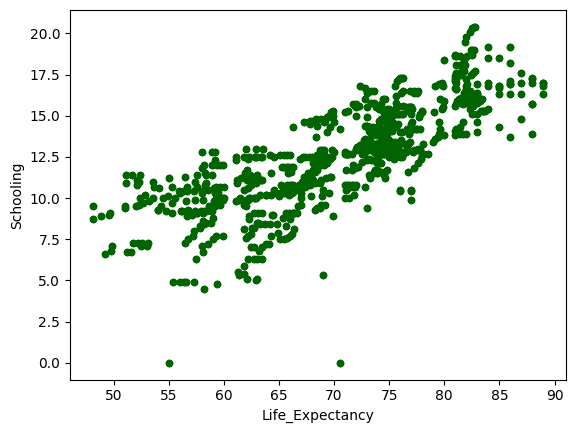

In [ ]:
# Creates a scattor plot of Life Expectancy and Schooling
expectancyDF.plot.scatter(x='Life_Expectancy', y='Schooling', color="DarkGreen")

After plotting, I can create the linear regression model to determine the line of best fit for this particular set of data.

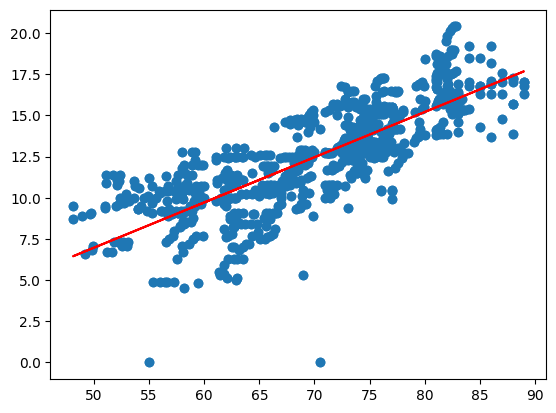

In [ ]:
# Creates linear regression model for Life Expectancy and Schooling

# Perform regression to find the best line to goes through these points

from sklearn.linear_model import LinearRegression

# Save the first column (all the rows) in X
X = expectancyDF.iloc[:, 2].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = expectancyDF.iloc[:, 10].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

Now that I have the line of best fit, I can calculate its slope and y-intercept.

In [ ]:
# Prints out the slope and y-intercept of the linear regression model
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[0.27456653]]
The intercept:  [-6.75899715]


Next, I want to create a temporary data frame with all the previous data and the predicted values for Schooling. This can help me visually compare the predicted and actual Schooling values.

In [ ]:
# Creates a temporary data frame to add the predicted Schooling values to compare against actual values
tempDF = expectancyDF.copy()

tempDF['Predicted_Schooling'] = Y_pred

tempDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Predicted_Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2,9.385515
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5,9.495341
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8,9.577711
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9,9.687538
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0,9.687538
...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1,8.314705
1706,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8,8.781468
1707,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4,9.165861
1708,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3,9.495341


Now, I calculate the error analysis for Life_Expectancy and Schooling. I do this calculation so I can see how far off Schooling is from the line of best fit with mean squared error. And, with R2 I can see how much of the Life expectancy data is explained by the Schooling data points.

In [ ]:
# Error analysis for Life Expectancy and Schooling
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))


MSE:  3.347967356691713
R2:  0.6360123754971367


Given these answers, I can see that around 63% of the Life_expectancy data is explained by the Schooling data. And, the average distance from the line of best fit was around 3.

Now, I repeat the previous process except with BMI data instead of Schooling data.

<Axes: xlabel='Life_Expectancy', ylabel='BMI'>

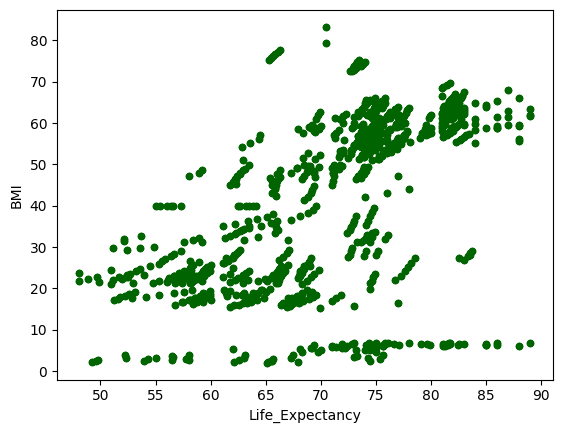

In [ ]:
# Creates a scattor plot of Life Expectancy and BMI
expectancyDF.plot.scatter(x='Life_Expectancy', y='BMI', color="DarkGreen")

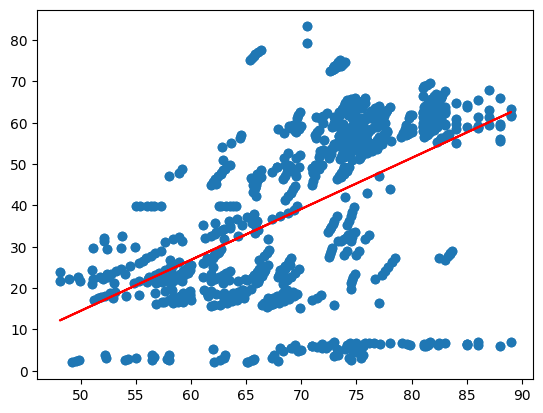

In [ ]:
# Creates linear regression model for Life Expectancy and BMI

# Perform regression to find the best line to goes through these points

from sklearn.linear_model import LinearRegression

# Save the first column (all the rows) in X
X = expectancyDF.iloc[:, 2].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = expectancyDF.iloc[:, 6].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [ ]:
# Prints out the slope and y-intercept of the linear regression model
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[1.23226347]]
The intercept:  [-47.09673303]


In [ ]:
# Creates a temporary data frame to add the predicted BMI values to compare against actual values
tempDF = expectancyDF.copy()

tempDF['Predicted_BMI'] = Y_pred

tempDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Predicted_BMI
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2,25.360359
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5,25.853264
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8,26.222943
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9,26.715849
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0,26.715849
...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1,20.554531
1706,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8,22.649379
1707,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4,24.374548
1708,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3,25.853264


In [ ]:
# Error analysis for Life Expectancy and BMI
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))


MSE:  305.8993900118961
R2:  0.27808593285426275


Given the BMI data, around 27% of the Life_expectancy data was explained by the BMI data. And, the average distance from the line of the best fit was 305.

Next, I repeat this process one last time with GDP data against Life_Expectancy.

<Axes: xlabel='Life_Expectancy', ylabel='GDP'>

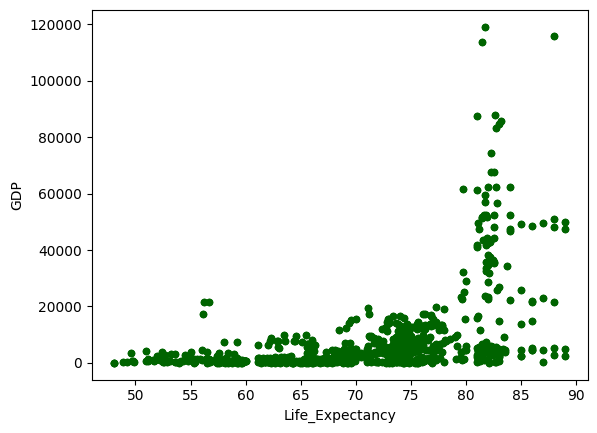

In [ ]:
# Creates a scattor plot of Life Expectancy and GDP
expectancyDF.plot.scatter(x='Life_Expectancy', y='GDP', color="DarkGreen")

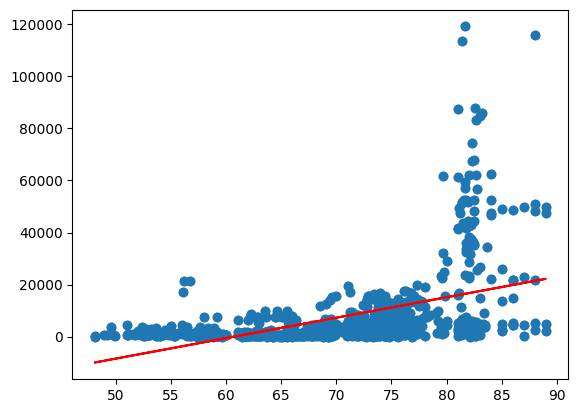

In [ ]:
# Creates linear regression model for Life Expectancy and GDP

# Perform regression to find the best line to goes through these points

from sklearn.linear_model import LinearRegression

# Save the first column (all the rows) in X
X = expectancyDF.iloc[:, 2].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = expectancyDF.iloc[:, 8].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [ ]:
# Prints out the slope and y-intercept of the linear regression model
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[785.62516825]]
The intercept:  [-47708.18263616]


In [ ]:
# Creates a temporary data frame to add the predicted GDP values to compare against actual values
tempDF = expectancyDF.copy()

tempDF['Predicted_GDP'] = Y_pred

tempDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Predicted_GDP
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2,-1513.422743
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5,-1199.172676
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8,-963.485125
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9,-649.235058
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0,-649.235058
...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1,-4577.360899
1706,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8,-3241.798113
1707,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4,-2141.922878
1708,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3,-1199.172676


In [ ]:
# Error analysis for Life Expectancy and GDP
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))


MSE:  170991199.9393975
R2:  0.21881452813912783


Given the GDP data, around 21% of the Life_Expectancy was explained by the GDP data. And, the average distance from the line of best fit was very large.

In this project, the factor with the best model is Schooling. With 67% of the Life_Expectancy being explained by Schooling data, it shows how countries with higher schooling percentages have higher life expectancies. Also, the linear regression model for Schooling was the closest to the predicted values with an MSE of 3.